# Введение

В данном кейсе рассматриваются бизнес-показатели крупного интернет-магазина.\
Аналитиками совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки.\
Необходимо приоритизировать гипотезы, провести A/B-тест и проанализировать результаты.\
\
Работа состоит из двух частей.\
\
**Часть 1. Приоритизация гипотез.**\
Имеется 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами *Reach, Impact, Confidence, Effort.*\
\
**Задача:**
- Применить фреймворк ICE для приоритизации гипотез. 
- Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез.
- Отсортировать их по убыванию приоритета.
- Как изменилась приоритизация гипотез при применении RICE вместо ICE. Вывод.

Метод ICE будет рассчитан по формуле:\
    ICE = Impact x Confidence / Efforts\
Метод RICE будет рассчитан по формуле:\
    RICE = Reach x Impact x Confidence / Efforts


**Часть 2. Анализ A/B-теста**
\
**Задача**\
Проанализировать A/B-тест:
- График кумулятивной выручки по группам. Выводы и предположения.
- График кумулятивного среднего чека по группам. Выводы и предположения.
- График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
- График кумулятивной конверсии по группам. Выводы и предположения.
- График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.
- Точечный график количества заказов по пользователям. Выводы и предположения.
- 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.
- Точечный график стоимостей заказов. Выводы и предположения.
- 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.
- Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.
- Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
- Статистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения.
- Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
- Решение по результатам теста. **Варианты решений:**
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

# Часть 1. Приоритизация гипотез.
В файле */datasets/hypothesis.csv* 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами *Reach, Impact, Confidence, Effort.*\
\
**Задача:**
- Применить фреймворк ICE для приоритизации гипотез. 
- Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез.
- Отсортировать их по убыванию приоритета.
- Как изменилась приоритизация гипотез при применении RICE вместо ICE. Вывод.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
print(hypothesis.head(10))
pd.options.display.max_colwidth = 250

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  


## Фреймфорк ICE.

In [2]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'],2)
print(hypothesis.sort_values('ICE', ascending=False))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

По результатам оценки во фреймворке ICE приоритетными гипотезами для А/В-теста являются гипотезы с индексами:\
8 - Запустить акцию, дающую скидку на товар в день рождения,\
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,\
7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

## Фреймворк RICE.

In [3]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
print(hypothesis.sort_values('RICE', ascending=False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

По результатам оценки во фреймворке RICE приоритетными гипотезами для А/В-теста являются гипотезы с индексами:\
7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,\
2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,\
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

## Вывод
Приоритезация методами ICE и RICE имеет различия, т.к. RICE, помимо параметров *Impact, Confidence, Effort* учитывает еще *Reach* - охват пользователей. Который, при тех же значениях *Confidence, Effort*, оказывает большее влияние на величину расчитываемого показателя, чем *Impact* и, соответственно, на очередность (приоритет) гипотез в датасете.\
\
По результатам **ICE** первая пятерка:\
    8 - Запустить акцию, дающую скидку на товар в день рождения\
    0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей\
    7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок\
    6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию\
    2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа\
По результатам **RICE**:\
    7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок\
    2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа\
    0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей\
    6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию\
    8 - Запустить акцию, дающую скидку на товар в день рождения

# Часть 2. Анализ A/B-теста
Результаты проведённого A/B-тест получены и описаны в файлах */datasets/orders.csv* и */datasets/visitors.csv.*\
\
**Задача**\
Проанализировать A/B-тест:
- График кумулятивной выручки по группам. Выводы и предположения.
- График кумулятивного среднего чека по группам. Выводы и предположения.
- График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
- График кумулятивной конверсии по группам. Выводы и предположения.
- График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.
- Точечный график количества заказов по пользователям. Выводы и предположения.
- 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.
- Точечный график стоимостей заказов. Выводы и предположения.
- 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.
- Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.
- Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
- Статистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения.
- Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
- Решение по результатам теста. **Варианты решений:**
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

In [4]:
orders = pd.read_csv('/datasets/orders.csv')
print(orders.head(5))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B


In [5]:
#общая информация о дф
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
#проверка наличия дубликатов записей
orders.duplicated().mean()

0.0

In [7]:
visitors = pd.read_csv('/datasets/visitors.csv')
print(visitors.head(5))

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [8]:
#общая информация
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
#проверка наличия дубликатов записей
visitors.duplicated().mean()

0.0

In [10]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

В имеющихся датафреймах пропусков и дубликатов нет.\
Имеется две группы пользователей. Группы разделены не равномерно: А - 557, В - 640. Возможно, есть пользователи, которые присутствуют в обеих группах.

In [11]:
groupA = orders.query('group == "A"')['visitorId'].unique()
groupB = orders.query('group == "B"')['visitorId'].unique()
ABvisitors = list(set(groupA) & set(groupB))
print(len(ABvisitors))

58


Имеется 58 пользователей, которые входят в обе группы теста. Вероятно, что они совевршали покупки несколько раз в течении периода тестирования и при делении трафика попали в обе группы. Возможно, есть какие-то технические особенности при делении пользователей по группам. Пользователи, попавшие в обе группы, совершили не менее двух заказов за период теста. В дальнейшем анализе проверим, являются ли они аномальными.

In [12]:
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01
Дата окончания теста: 2019-08-31


In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(\
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
    .sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(\
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
    .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

         date group  transactions  buyers  revenue  visitors
0  2019-08-01     A            24      20   148579       719
1  2019-08-01     B            21      20   101217       713
2  2019-08-02     A            44      38   242401      1338
3  2019-08-02     B            45      43   266748      1294
4  2019-08-03     A            68      62   354874      1845


## График кумулятивной выручки по группам

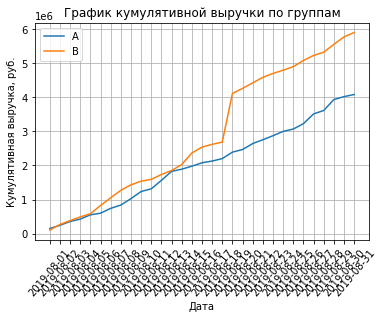

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка, руб.')
plt.legend()
plt.xticks(rotation=50)
plt.rcParams['figure.figsize'] = [15, 5]
plt.grid(True)
None

График А имеет равномерный рост с незначительными колебаниями. График В имеет излом - резкий рост, что говорит о начличии выбросов. Возможно, резкий рост заказов или появились очень дорогие заказы.

## График кумулятивного среднего чека по группам

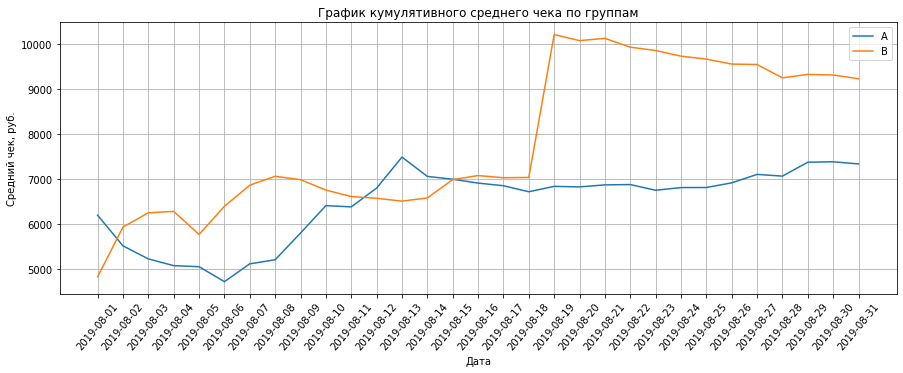

In [15]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')
plt.legend()
plt.xticks(rotation=50)
plt.rcParams['figure.figsize'] = [15, 5]
plt.grid(True)
None

Для обеих групп графики средних чеков имеют колебания в первой половине периода наблюдений. график В имеет резкий скачок значений. Возможно, появились очень дорогие заказы. Затем оба графика стабилизировались. График А имеет тенденцию к росту, график В - к падению.

## График относительного изменения кумулятивного среднего чека группы B к группе A

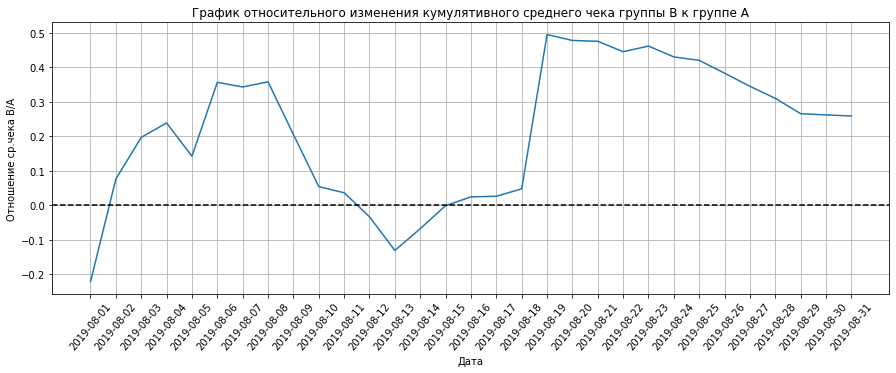

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение ср.чека В/А')
plt.xticks(rotation=50)
plt.rcParams['figure.figsize'] = [15, 5]
plt.grid(True)

График различия среднего чека имеет резкие скачки.  В группе В имеются очень крупные заказы. Средние чеки групп А и В практически несопоставимы. После 19/08/2019 наблюдается снижение среднего чека группы В относительно группы А.

## График кумулятивной конверсии по группам

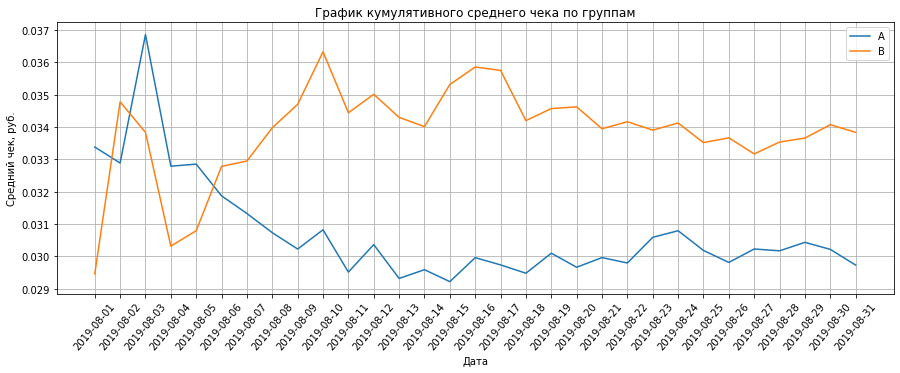

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['transactions']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')
plt.legend()
plt.xticks(rotation=50)
plt.rcParams['figure.figsize'] = [15, 5]
plt.grid(True)

В начале теста набдюдаются скачки кумулятивной конверсии для обеих групп. Затем графики стабилизировались. Кумулятивная конверсия группы В стабильно больше, чем группы А.

## График относительного изменения кумулятивной конверсии группы B к группе A

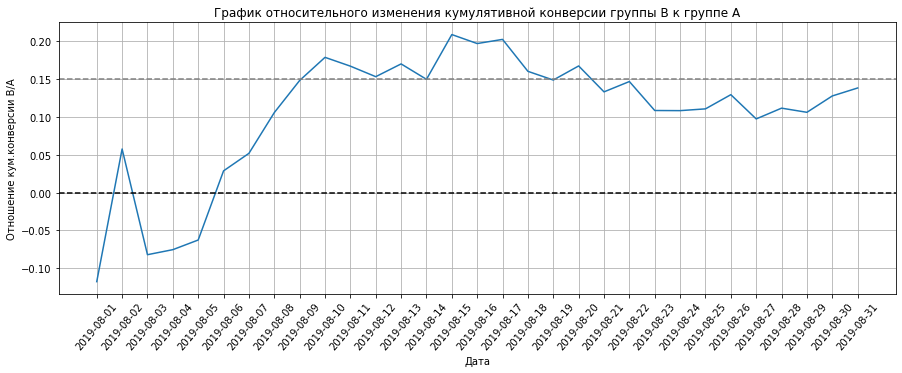

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение кум.конверсии В/А')
plt.xticks(rotation=50)
plt.rcParams['figure.figsize'] = [15, 5]
plt.grid(True)

В начале теста кумулятивная конверсия группы В резко возросла по отношению к группе А. После 10 дней стабилизировалась.

## Точечный график количества заказов по пользователям

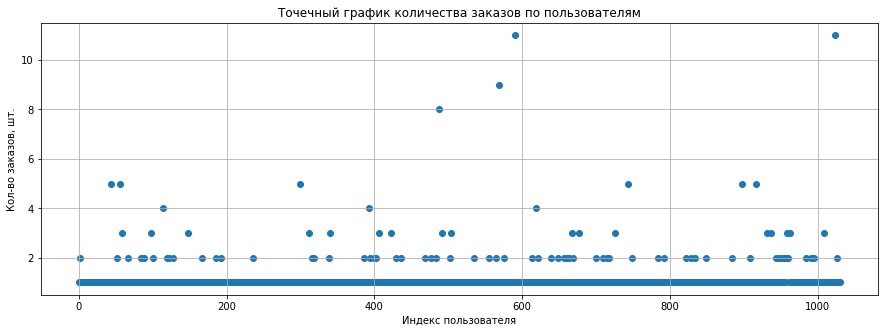

In [19]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Индекс пользователя')
plt.ylabel('Кол-во заказов, шт.')
plt.rcParams['figure.figsize'] = [5, 5]
plt.grid(True)
None

Много пользователей с 2-5 заказами. Чтобы проверить являются ли они выбросами нужно посчитать перцентили.

## 95-й и 99-й перцентили количества заказов на пользователя

In [20]:
print(np.percentile(ordersByUsers['orders'],[90,95,99]))

[1. 2. 4.]


Не более 1% пользователей оформили заказ более 4 раза, не более 5% - более 2 раз. Разумно выбрать границей отбора 2 заказа. Тех, кто заказал больше, исключим из дальнейшего анализа, что составит 5% пользователей.

## Точечный график стоимостей заказов

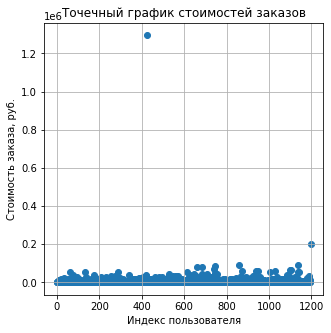

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Индекс пользователя')
plt.ylabel('Стоимость заказа, руб.')
plt.rcParams['figure.figsize'] = [5, 5]
plt.grid(True)
None

Есть заказы стоимостью около 200 000 и 1 300 000 рублей - явные выбросы. Остальные заказы сливаются, изменим границу построения.

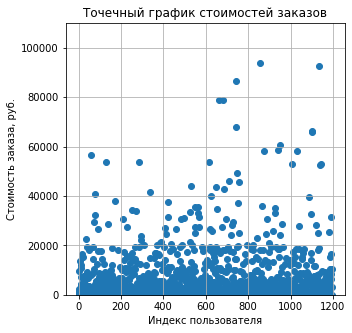

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0,0.11*1e6)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Индекс пользователя')
plt.ylabel('Стоимость заказа, руб.')
plt.rcParams['figure.figsize'] = [5, 5]
plt.grid(True)
None

## 95-й и 99-й перцентили стоимости заказов

In [23]:
print(np.percentile(orders['revenue'],[90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233,2 рублей. За границу выбросов примем заказы дороже 40 000 рублей, что составит от 1% до 5% пользователей.

## Статистическая значимость различий в конверсии между группами по «сырым» данным

In [24]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

# добавим 0 заказов всем посетителям, которые ничего не купили
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Различие в средних: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.01679
Различие в средних: 0.138


In [24]:
#подготовка данных для расчёта
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)
data['conversionPerDateA'] = data['ordersPerDateA'] / data['visitorsPerDateA']
data['conversionPerDateB'] = data['ordersPerDateB'] / data['visitorsPerDateB']

print(data.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  visitorsPerDateA  visitorsPerDateB  conversionPerDateA  \
0           101217               719               713            0.033380   
1           165531               619               581            0.032310   
2           114248               507               509            0.047337   
3           108571               717               770            0.022315   
4            92428               756               707            0.033069   

   conversionPerDateB  
0            0.029453  
1            0.041308  
2            0.031434  
3            0.022078  
4            0

Проверим статистическую значимость различий в конверсии между сегментами.\
Нулевая гипотеза: различий в конверсии между группами нет.\
Альтернативная гипотеза: различия в конверсии между группами есть.

In [25]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(data['conversionPerDateA'], data['conversionPerDateB'])[1]))
print('Относительное различие конверсий В/А: {0:.3f}'.format(data['conversionPerDateB'].mean()/ data['conversionPerDateA'].mean()-1))

p-value: 0.086
Относительное различие конверсий В/А: 0.150


По «сырым» данным статистически значимых различий в конверсии групп A и B нет.\
P-value - 0,086 больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в конверсии есть статистически значимые различия.\
При этом, коверсия группы B выше конверсии группы A на 15%.

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между сегментами.\
Нулевая гипотеза: различий в среднем чеке между группами нет.\
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [26]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие средних чеков В/А: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительное различие средних чеков В/А: 0.259


P-value больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть статистически значимые различия.\
Впрочем, средний чек группы B значительно выше среднего чека группы A - на 26%.

## Статистическая значимость различий в конверсии между группами по «очищенным» данным

За аномальных пользователей приняли тех, кто совершил более 2 заказов или совершил заказ более чем на 40 000 рублей.

In [27]:
manyOrder = 2
expensiveOrder = 40000

ordersByUsers = (orders\
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

usersWithManyOrders = ordersByUsers[ordersByUsers['orders'] > manyOrder]['visitorId']

usersWithExpensiveOrders = orders[orders['revenue'] > expensiveOrder]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
44      199603092
55      237748145
59      249864742
684     358944393
Name: visitorId, dtype: int64
55


55 аномальных пользователей. Проверим, есть ли среди них те, кто присутствует в обеих группах теста:

In [33]:
print(len(list(set(ABvisitors) & set(abnormalUsers))))

25


25 аномальных пользователей содержатся в обеих группах. Исключение их из анализа сделает результаты точнее.

In [34]:
#подготовка данных для расчёта

ordersADailyFiltered = (
    orders[np.logical_and(orders['group'] == 'A',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                         )
            ][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADailyFiltered.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDailyFiltered = (
    orders[np.logical_and(orders['group'] == 'B',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                         )
            ][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDailyFiltered.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

dataFiltered = (
    ordersADailyFiltered.merge(
        ordersBDailyFiltered, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)
dataFiltered['conversionPerDateA'] = dataFiltered['ordersPerDateA'] / dataFiltered['visitorsPerDateA']
dataFiltered['conversionPerDateB'] = dataFiltered['ordersPerDateB'] / dataFiltered['visitorsPerDateB']

print(dataFiltered.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              18           112340              19   
1  2019-08-02              19            92132              23   
2  2019-08-03              24           112473              14   
3  2019-08-04              11            41176              15   
4  2019-08-05              24           109723              22   

   revenuePerDateB  visitorsPerDateA  visitorsPerDateB  conversionPerDateA  \
0            78258               719               713            0.025035   
1           162043               619               581            0.030695   
2            67049               507               509            0.047337   
3           105291               717               770            0.015342   
4            90008               756               707            0.031746   

   conversionPerDateB  
0            0.026648  
1            0.039587  
2            0.027505  
3            0.019481  
4            0

Проверим статистическую значимость различий в конверсии между сегментами после очистки данных.\
Нулевая гипотеза: различий в конверсии между группами нет.\
Альтернативная гипотеза: различия в конверсии между группами есть.

In [35]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(dataFiltered['conversionPerDateA'], dataFiltered['conversionPerDateB'])[1]))
print('Относительное различие конверсий В/А: {0:.3f}'.format(dataFiltered['conversionPerDateB'].mean() / dataFiltered['conversionPerDateA'].mean()-1))

p-value: 0.024
Относительное различие конверсий В/А: 0.202


После "очистки" данных от аномальных пользователей p-value составил 0,024 < 0,05. Это говорит о том, что нулевая гипотеза отвергнута и различия в конверсии между группами А и В имеется. При этом конверсия группы В на 20% больше конверсии группы А.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проверим статистическую значимость различий в среднем чеке между сегментами после очистки данных.
Нулевая гипотеза: различий в среднем чеке между группами нет.
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [37]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие средних чеков В/А: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.916
Относительное различие средних чеков В/А: 0.058


P-value после "очистки" по-прежнему больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.\
Отличие среднего чека группы B от среднего чека группы A после "очистки данных" изменилось с 26% на 5,8%.

## Решение по результатам теста

1. По «сырым» данным статистически значимых различий в конверсии групп A и B нет.\
P-value - 0,086 больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в конверсии есть статистически значимые различия.\
При этом, коверсия группы B выше конверсии группы A на 15%.

2. После "очистки" данных от аномальных пользователей p-value составил 0,024 < 0,05. Это говорит о том, что нулевая гипотеза отвергнута и различия в конверсии между группами А и В имеется. При этом конверсия группы В на 20% больше конверсии группы А.

3. P-value (0,729) больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть статистически значимые различия.\
Впрочем, средний чек группы B значительно выше среднего чека группы A - на 26%.

4. P-value после "очистки" (0,916) по-прежнему больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.\
Отличие среднего чека группы B от среднего чека группы A после "очистки данных" изменилось с 26% на 5,8%.

Итоги:
* Нет статистически значимого различия по конверсии между группами по «сырым» данным.
* Есть статистически значимое различие по конверсии между группами по данным после фильтрации аномалий.
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
* График относительного изменения кумулятивной конверсии группы B к группе A стабилизировался и имеет некоторую тенденцию к уменьшению разницы, но выше него.

**Вывод:** Средние чеки не отличаются, но у группы В конверсия выше на 20%. Можно остановить тест и зафиксировать победу группы В.